#### tensorflow is powered by google, pytorch is powered by meta, mxnet is powered by amazon

# Dataset Preparation

In [30]:
%matplotlib notebook

import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import datasets
import torch
import torch.nn as nn
from tqdm.notebook import tqdm

In [31]:
def plot_data(samples, labels):
    #plt.style_use("seaborn")
    fig, ax = plt.subplots()
    ax.scatter(samples[:, 0], samples[:, 1], c = labels, cmap = "plasma")
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    fig.tight_layout()

In [32]:
def make_circles(num_samples):
    
    return datasets.make_circles(num_samples)

def make_moons(num_samples):
    
    return datasets.make_moons(num_samples)

def make_clouds(num_samples, all_means, all_stds, num_features):
    
    all_samples, all_labels = [], []
    for i, (mean, std) in enumerate(zip(all_means, all_stds)): # i represents the first class
        
        all_samples.append(np.random.normal(mean, std, (num_samples, num_features)))
        all_labels.append([i] * num_samples) #duplicate what's inside the list
        
    return np.vstack(all_samples), np.hstack(all_labels)

<IPython.core.display.Javascript object>


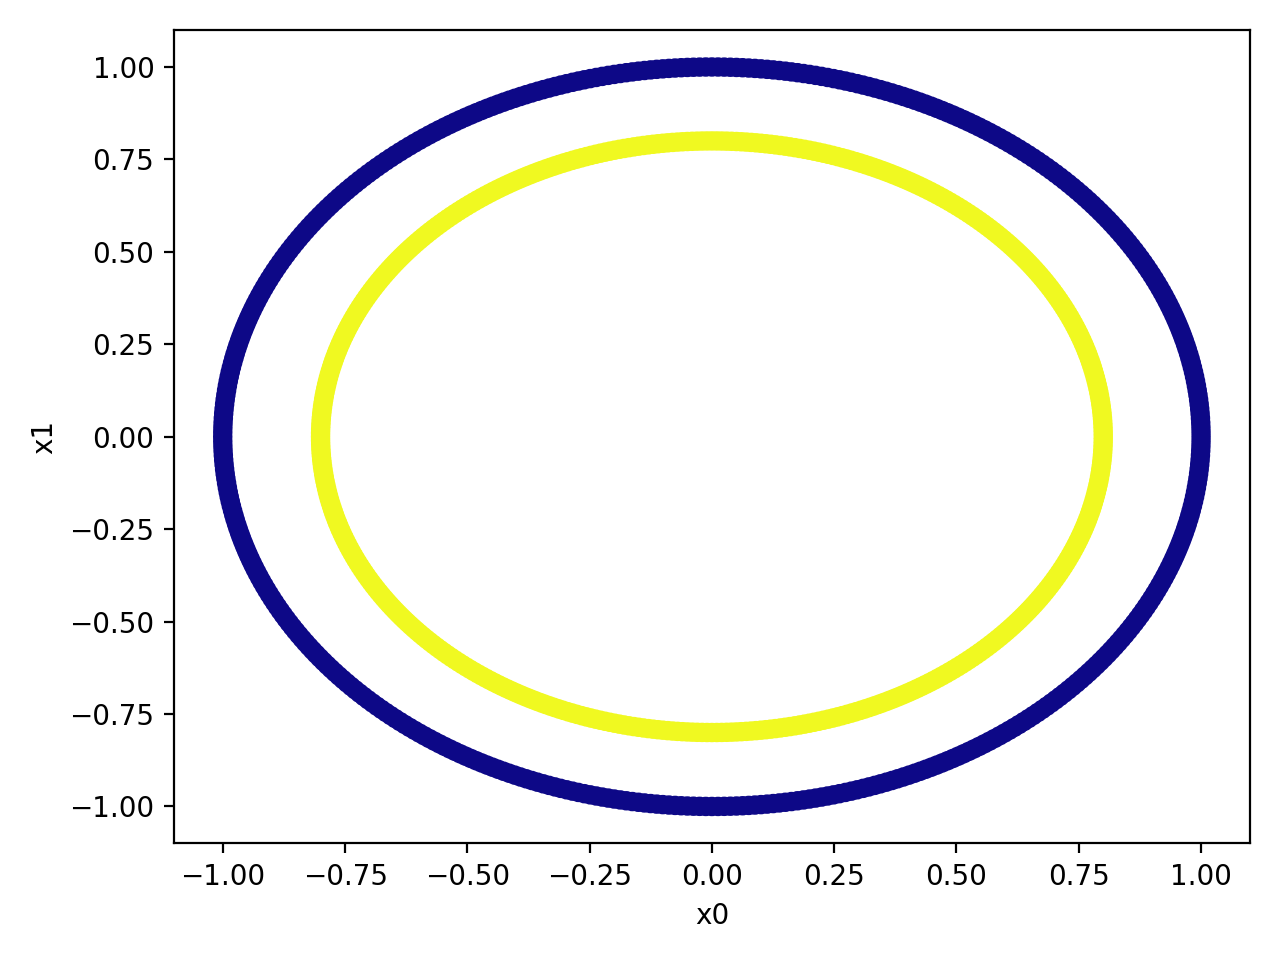

In [33]:
num_samples = 1000
samples, labels = make_circles(num_samples)

plot_data(samples, labels)

<IPython.core.display.Javascript object>


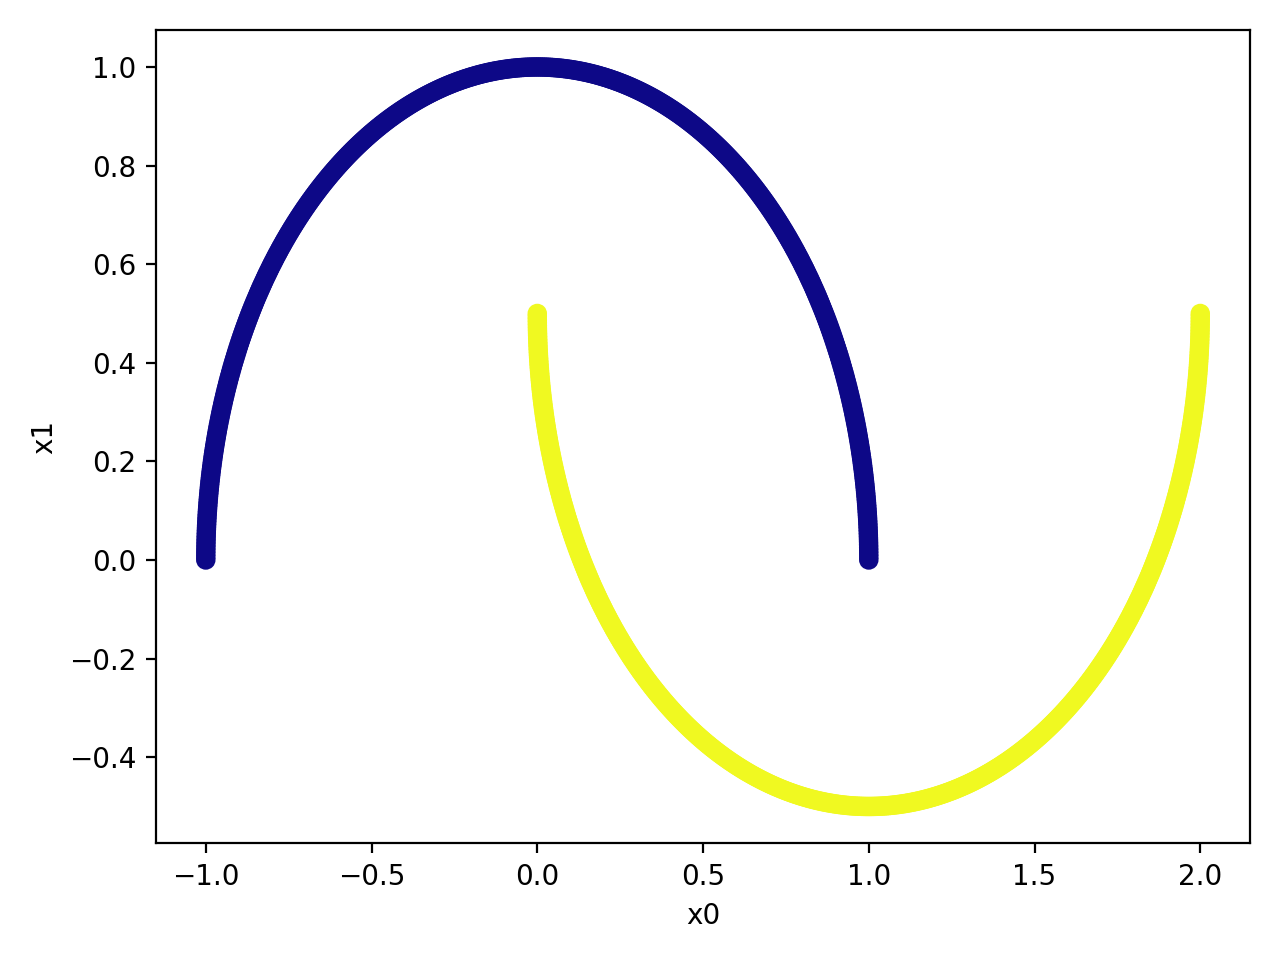

In [34]:
samples, labels = make_moons(num_samples)
plot_data(samples, labels)

<IPython.core.display.Javascript object>


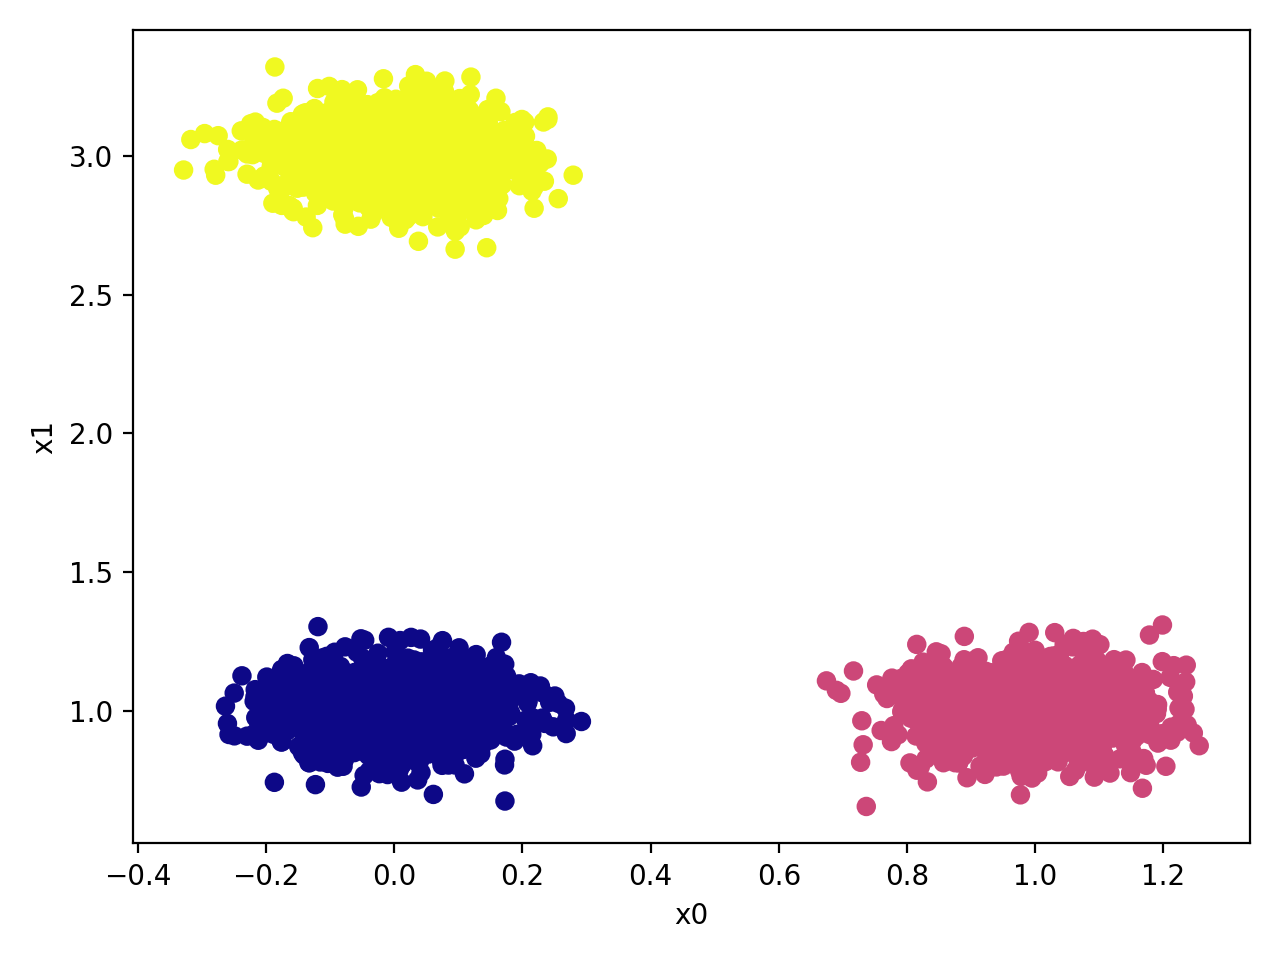

In [35]:
all_means = [(0, 1), (1, 1), (0, 3)] # 3 classes
all_stds = [0.1, 0.1, 0.1] # 3 classes
num_features = len(all_means[0])

samples, labels = make_clouds(num_samples, all_means, all_stds, num_features)
plot_data(samples,labels)

# format datasets

In [36]:
class Dataset(torch.utils.data.Dataset):
    
    def __init__(self, samples, labels):
        
        super(Dataset, self).__init__()
        
        self.create_dataset(samples, labels)
        
    def create_dataset(self, all_samples, all_labels):
        
        self.dataset = []
        
        for sample, label in zip(all_samples, all_labels):
            
            sample = torch.tensor(sample).float()
            label = torch.tensor(label).long()
            
            self.dataset.append( (sample, label))
    
    # need to override a few methods
    
    def __getitem__(self, index):
        
        return self.dataset[index]
    
    def __len__(self):
        
        return len(self.dataset)
        
dataset = Dataset(samples, labels)

In [37]:
train_dataset = Dataset(samples, labels)
valid_dataset = Dataset(samples, labels) #resubstitution-> only show one time as a proof of concept

# cross validation? 
# try to minimize error and maximize accuracy

batch_size = 16  #we're doing minibatch
train_dataset = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
valid_dataset = torch.utils.data.DataLoader(train_dataset, batch_size = 1, shuffle = False)

# create a NN

In [38]:
class MLP(torch.nn.Module):
    
    def __init__(self, learning_rate, num_features, num_classes):
        
        super(MLP, self).__init__()
        
        self.alpha = learning_rate
        
        self.network = torch.nn.Sequential(torch.nn.Linear(num_features, 12),  # subset of python list. it's like a pytorch list. holds pytorch layers
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(12,24), #observe 12 (increase to make wider) inputs, each layer has 24 neurons
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(24, num_classes)) # observe 24 inputs from the last layer...uh?
        
        # the weights are initialized automatically. learn how to manipulate them directly.
        
    def init_optimizer(self):
        
        self.optimizer = torch.optim.SGD(self.parameters(), lr = self.alpha)
        
    def objective(self, preds, labels):
        
        obj = torch.nn.CrossEntropyLoss() #log based classification error function. swap this out with other loss functions
        return obj(preds, labels) # add lambda for multicriteria loss
    
    def forward(self, x):
        return self.network(x)

In [39]:
learning_rate = 1e-4
num_classes = len(np.unique(labels))

model = MLP(learning_rate, num_features, num_classes)

# train nn to make predictions

In [ ]:
def calculate_accuracy(all_preds, all_labels):
    
    accuracy = 0
    
    for i, (pred, label) in enumerate(zip(all_preds, all_labels)):
        #pred = 
        
        if(pred == label):
            accuracy = accuracy + 1
            
    return 

In [40]:
num_epochs = 100

model.initialize_optimizer()

training_loss, training_acc = [], []

for epoch in range(num_epochs):
    
    # train
    model.train()
    epoch_loss = 0  # how are we performing over time
    
    for i, (x, d) in enumerate(train_dataset): # d is truth label
        
        preds = model(x)
        
        loss = model.objective(preds, d)
        
        epoch_loss = epoch_loss + loss.item()
        
        #updating network parameters
        model.optimizer.zero_grad() #clear anything in history
        
        loss.backward() # back propagation
        
        model.optimzer.step() # gradient descent
        
    epoch_loss = epoch+loss / (i + 1)
    
    training_loss.append(epoch_loss)
    
    # validate
    model.eval()

    all_preds = []
    
    for i, (x, d) in enumerate(train_dataset):
        
        preds = model(x)
        all_preds.append(preds.numpy())
        
    epoch_accuracy = calculate_accuracy(all_preds, labels)
    
    training_accuracy.append(epoch_accuracy)
    
    


AttributeError: 'MLP' object has no attribute 'initialize_optimizer'

# plot analytics

In [41]:
def plot_results(results, title):
    
    fig, ax = plt.subplots()
    
    apochs = np.arange(0, len(results, 1), 1)  # bug here
    
    ax.plot(epochs, results, "-o")
    
    ax.set_xlabel("Epochs")
    ax.set_ylabel(title)
    
    fig.tight_layout()

In [42]:
plot_results(training_loss, "Loss")

NameError: name 'training_loss' is not defined